# Program Initialization Section

Dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/blihardinata/Python_Portfolio/main/Customer_Reviews/Womens%20Clothing%20E-Commerce%20Reviews.csv')
df.head(4)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


## Data Exploration

In [3]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.shape

(23486, 11)

In [6]:
#checking the value counts for recommendation
df['Recommended IND'].value_counts()
#1 = recommended, 0 = not recommended

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [7]:
df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [8]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [9]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

# Data Cleaning and transformation

In [10]:
#checking null
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [11]:
#there are too many NA values under title. Hence, we need to delete the whole column
df.drop(columns= ['Title', 'Unnamed: 0'], inplace=True)

In [12]:
#Review text, division name, department name, and class name are strings. 
df.dropna(subset=['Review Text', 'Division Name', 'Department Name', 'Class Name'], inplace= True)

In [13]:
df.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [14]:
#changing clothing ID into object
df['Clothing ID'].astype(str)

0         767
1        1080
2        1077
3        1049
4         847
         ... 
23481    1104
23482     862
23483    1104
23484    1084
23485    1104
Name: Clothing ID, Length: 22628, dtype: object

In [15]:
df = df.rename(columns ={
    'Review Text':'Review',
    'Recommended IND':'Recommended?',
    'Division Name':'Division',
    'Department Name':'Department',
    'Class Name':'Style'
})
df.columns

Index(['Clothing ID', 'Age', 'Review', 'Rating', 'Recommended?',
       'Positive Feedback Count', 'Division', 'Department', 'Style'],
      dtype='object')

# Data Visualization

## The number of recommended products and ratings
- First graph: Number of recommended products
- Second graph: Number of ratings

No handles with labels found to put in legend.


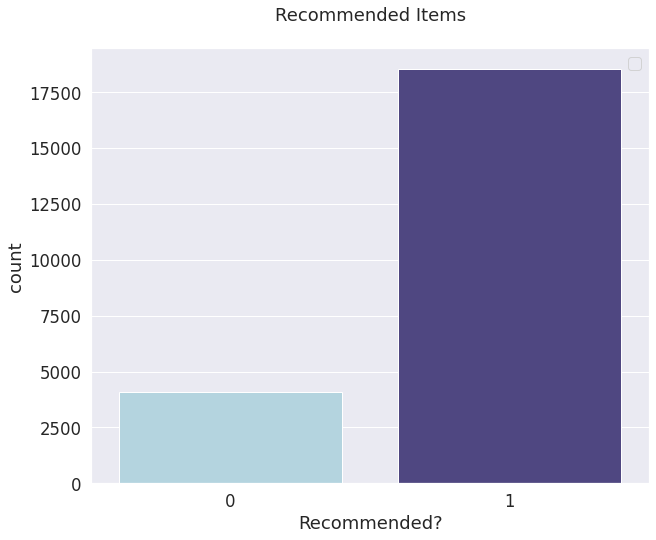

In [16]:
#counting recommended index
sns.set(font_scale=1.5)
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='Recommended?', palette=['LightBlue', 'DarkSlateBlue'])
plt.title("Recommended Items", y=1.05)
plt.legend()

No handles with labels found to put in legend.


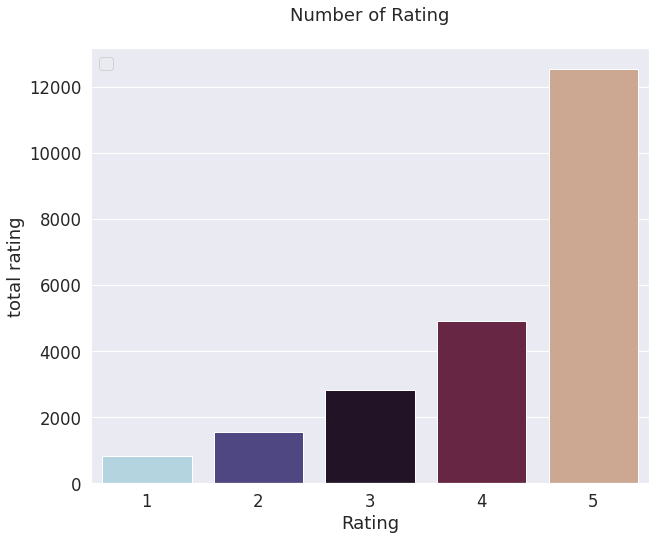

In [27]:
#counting number of rating
sns.set(font_scale=1.5)
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='Rating', palette=['LightBlue', 'DarkSlateBlue', '#241029','#721C43','#d6a589'])
plt.title("Number of Rating", y=1.05)
plt.ylabel("total rating")
plt.legend()

## Relationship between Rating and Recommended

In [18]:
rating_pivot = df.loc[:, ['Rating', 'Recommended?']]

In [19]:
#Review the relationship between rating and recommended items
rating_pivot = rating_pivot.pivot_table(index='Rating', columns='Recommended?', values='Recommended?', aggfunc=len)
rating_pivot

Recommended?,0,1
Rating,,
1,806,15
2,1455,94
3,1653,1170
4,164,4744
5,23,12504


In [20]:
rating_pivot = rating_pivot.apply(lambda x: x/sum(x), axis = 1)
rating_pivot

Recommended?,0,1
Rating,,
1,0.981730,0.018270
2,0.939316,0.060684
3,0.585547,0.414453
4,0.033415,0.966585
5,0.001836,0.998164


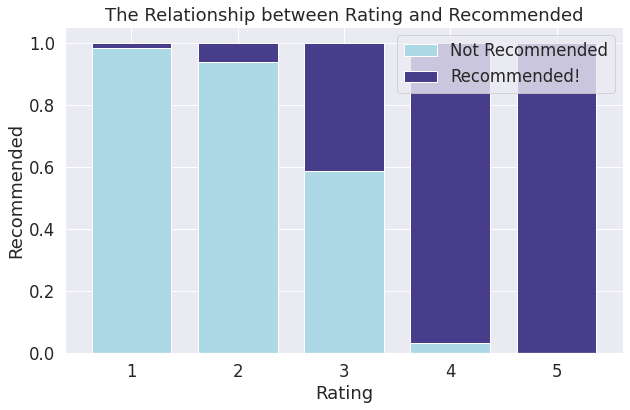

In [21]:
#ax = single object in the figure/graph
fig, ax = plt.subplots()
rating_pivot.plot(kind = "bar", stacked = True, figsize = (10,6), ax = ax, color = ['LightBlue', 'DarkSlateBlue'], width = 0.75)
ax.legend(['Not Recommended', 'Recommended!'])
plt.title('The Relationship between Rating and Recommended')
plt.xlabel('Rating')
plt.ylabel('Recommended')
plt.xticks(rotation = 0)
plt.show()

## Highest Ratings Dept

In [22]:
df['Department'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'],
      dtype=object)

In [23]:
dept_rating = df.loc[:, ['Department', 'Rating']]

In [24]:
dept_rating = dept_rating.pivot_table(index='Department', columns='Rating', values='Rating', aggfunc=len)

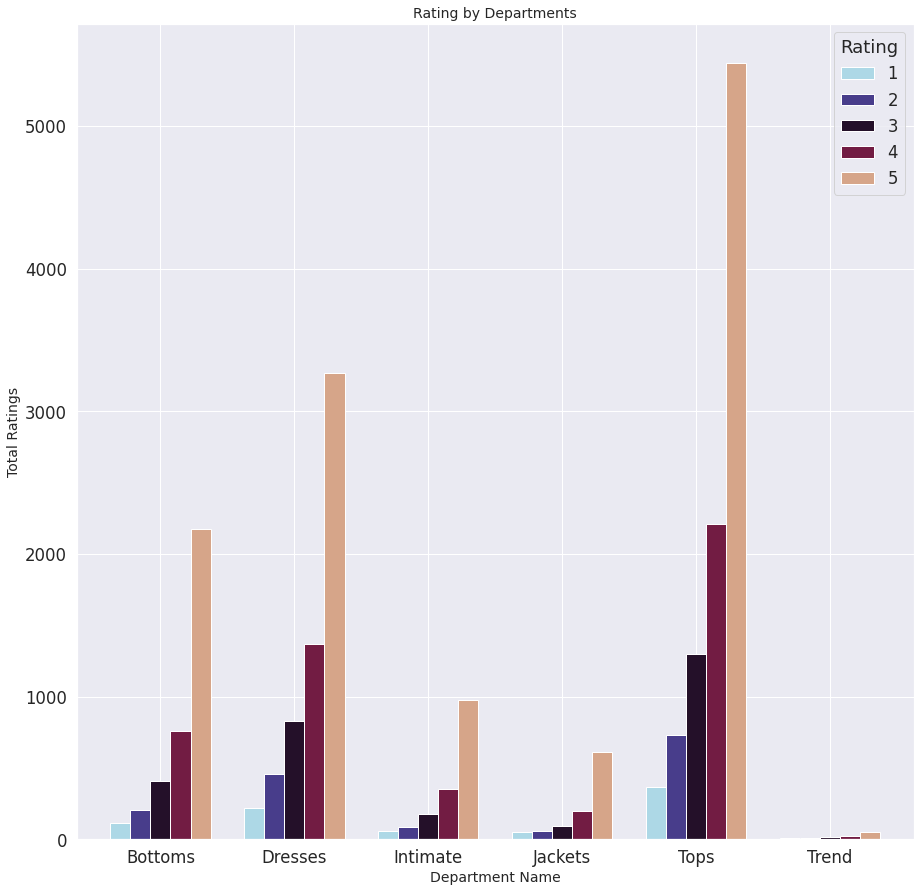

In [26]:
#ax = single object in the figure/graph
fig, ax = plt.subplots()
dept_rating.plot(kind = "bar", figsize = (15,15), ax = ax, color = ['LightBlue', 'DarkSlateBlue', '#241029','#721C43','#d6a589'], width = 0.75)
plt.title('Rating by Departments', fontsize=14)
plt.xlabel('Department Name', fontsize=14)
plt.ylabel('Total Ratings', fontsize=14)
plt.xticks(rotation = 0)
plt.show()

## Reviewing Customers Age group

In [28]:
df['Age'].describe()

count    22628.000000
mean        43.282880
std         12.328176
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Boxplot: Customer Age')

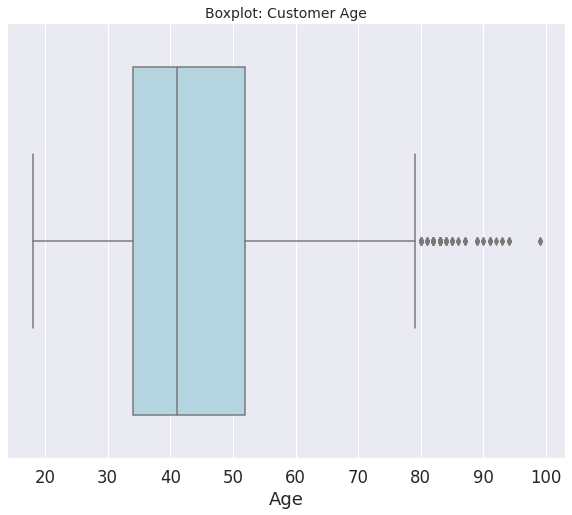

In [29]:
#Reviewing the outliers in the age group
sns.set(font_scale=1.5)
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x = 'Age', color = 'LightBlue')
plt.title('Boxplot: Customer Age', fontsize=14)

In [30]:
df['Age'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

0.0    18.0
0.2    33.0
0.4    39.0
0.6    45.0
0.8    54.0
1.0    99.0
Name: Age, dtype: float64

In [31]:
df['AgeGroup'] = pd.cut(x = df['Age'], bins= [0, 33, 39, 45, 54, 99], labels= ['18-33', '34-39', '40-45', '46-54', '55-99'])
df.head()

,Clothing ID,Age,Review,Rating,Recommended?,Positive Feedback Count,Division,Department,Style,AgeGroup
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,18-33
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,34-39
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,55-99
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,46-54
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,46-54


No handles with labels found to put in legend.


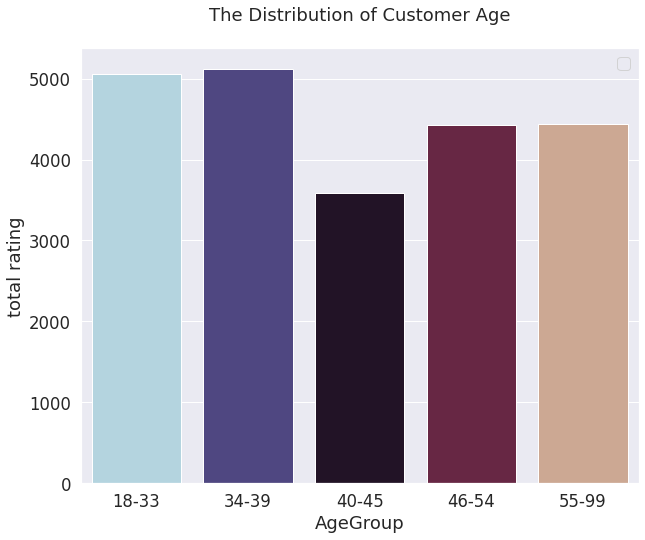

In [32]:
#counting number of rating
sns.set(font_scale=1.5)
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='AgeGroup', palette=['LightBlue', 'DarkSlateBlue', '#241029','#721C43','#d6a589'])
plt.title("The Distribution of Customer Age", y=1.05)
plt.ylabel("total rating")
plt.legend()

# Analyzing Stopwords

Resources: 
- https://www.geeksforgeeks.org/python-nlp-analysis-of-restaurant-reviews/
- https://stackoverflow.com/questions/47316783/python-dataframe-remove-duplicate-words-in-the-same-cell-within-a-column-in-pyt

In [ ]:
df['Perception'] = ['Positive' if rating > 3 else 'Negative' for rating in df['Rating']]

In [ ]:
df.head()

,Clothing ID,Age,Review,Rating,Recommended?,Positive Feedback Count,Division,Department,Style,AgeGroup,Perception
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,18-33,Positive
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,34-39,Positive
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,55-99,Negative
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,46-54,Positive
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,46-54,Positive


In [ ]:
import re
import nltk

In [ ]:
#downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#removing stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#create a new column for the cleaned reviews - convert the reviewes into lower caps text
df['CleanedReviews'] = df['Review'].str.lower()

In [ ]:
df['CleanedReviews']

0        absolutely wonderful - silky and sexy and comf...
1        love this dress!  it's sooo pretty.  i happene...
2        i had such high hopes for this dress and reall...
3        i love, love, love this jumpsuit. it's fun, fl...
4        this shirt is very flattering to all due to th...
                               ...                        
23481    i was very happy to snag this dress at such a ...
23482    it reminds me of maternity clothes. soft, stre...
23483    this fit well, but the top was very see throug...
23484    i bought this dress for a wedding i have this ...
23485    this dress in a lovely platinum is feminine an...
Name: CleanedReviews, Length: 22628, dtype: object

In [ ]:
# Replace non-alphanumeric with blank
# if "^" is inside the bracket, it means that a character NOT in (regex expression)
#0-9 matches a single character in the range between 0 (index 48) and 9 (index 57) (case sensitive)
#a-z matches a single character in the range between a (index 97) and z (index 122) (case sensitive)
#A-Z matches a single character in the range between A (index 65) and Z (index 90) (case sensitive)

df['CleanedReviews'] = df['CleanedReviews'].str.replace('[^0-9a-zA-Z]', " ")

In [ ]:
#Remove duplicate words in the cleaned reviews
#Example: Retain one "love" in this sentence: love love love jumpsuit fun flirty
# OrderedDict = Return an instance of a dict subclass that has methods specialized for rearranging dictionary order.
from collections import OrderedDict

df['CleanedReviews'] = (df['CleanedReviews'].str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' '))

In [ ]:
#removing stopwords from text
def remove_stopwords(reviews):
  #split the sentence with space
  sentencesplit = reviews.split(' ')
  #joining all words with  " " that are not within stop words as one continous sentence
  clean_text = " ".join([text for text in sentencesplit if text not in stop_words])
  return clean_text

In [ ]:
#applying the remove_stopword function into the reviews
df['CleanedReviews'] = df['CleanedReviews'].apply(remove_stopwords)

In [ ]:
df.head()

,Clothing ID,Age,Review,Rating,Recommended?,Positive Feedback Count,Division,Department,Style,AgeGroup,Perception,CleanedReviews
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,18-33,Positive,absolutely wonderful silky sexy comfortable
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,34-39,Positive,love dress sooo pretty happened find store gla...
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,55-99,Negative,high hopes dress really wanted work initially ...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,46-54,Positive,love jumpsuit fun flirty fabulous every time w...
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,46-54,Positive,shirt flattering due adjustable front tie perf...


## Positive WORDCLOUDS

- width : int (default=400) = Width of the canvas.
- height : int (default=200) = Height of the canvas.
- min_font_size : int (default=4) = Smallest font size to use. 
- max_words : number (default=200) = The maximum number of words.
- stopwords : set of strings or None = The words that will be eliminated. If None, the build-in STOPWORDS list will be used.

Resources: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
positive = df.loc[df.Perception == "Positive", 'CleanedReviews']
positive = pd.DataFrame(positive)
positive.head()

,CleanedReviews
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happened find store gla...
3,love jumpsuit fun flirty fabulous every time w...
4,shirt flattering due adjustable front tie perf...
6,aded basket hte last mintue see would look lik...


In [ ]:
#calculate the most_common words in 
#join all the sentences from all rows with a space and split it word by word
from collections import Counter
Counter(" ".join(positive['CleanedReviews']).split()).most_common(15)

[('love', 6369),
 ('size', 5309),
 ('fit', 4794),
 ('dress', 4750),
 ('wear', 4633),
 ('great', 4562),
 ('like', 4060),
 ('top', 3985),
 ('5', 3849),
 ('color', 3206),
 ('perfect', 3139),
 ('would', 2912),
 ('fabric', 2894),
 ('little', 2816),
 ('flattering', 2798)]

Insight: Customers love their tops and dresses because those products have great fit, flattering colors, and great fabrics. These reviews summarize the overall positive perceptions of the product lines. 

In [ ]:
#Building a histogram from positive counter
positive_count = pd.DataFrame(Counter(" ".join(positive['CleanedReviews']).split()).most_common(15))
positive_count.columns = ['Words', 'Values']
positive_count.head()

,Words,Values
0,love,6369
1,size,5309
2,fit,4794
3,dress,4750
4,wear,4633


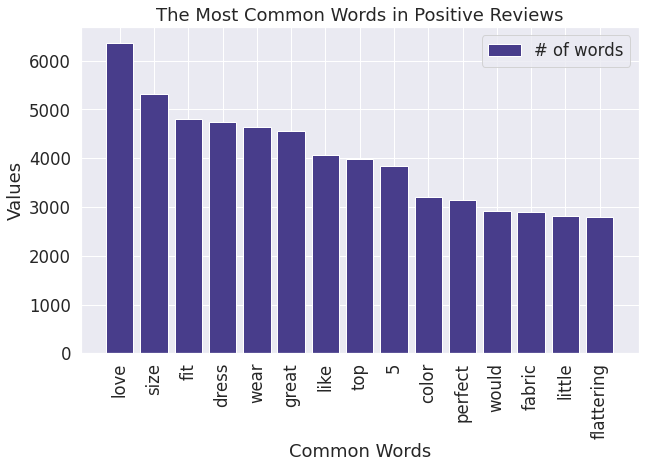

In [ ]:
#Plotting a graph for the most common words
plt.figure(figsize=(10,6))
plt.bar(positive_count.Words, positive_count.Values, color = 'DarkSlateBlue', label = '# of words')
plt.title('The Most Common Words in Positive Reviews')
plt.xlabel('Common Words')
plt.ylabel('Values')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

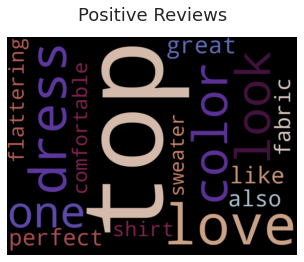

In [ ]:
pos_text = ' '.join(positive['CleanedReviews'])

#adding more stop words
additional_stop_words = ["sooo", "https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 
                         'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] + list(stop_words)

positive_cloud = WordCloud(background_color='black', stopwords=additional_stop_words,  width=2000, height= 1500, max_words=15, colormap="twilight").generate(pos_text)
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews", y = 1.05)
plt.show()


## Negative WORDCLOUDS

- width : int (default=400) = Width of the canvas.
- height : int (default=200) = Height of the canvas.
- min_font_size : int (default=4) = Smallest font size to use. 
- max_words : number (default=200) = The maximum number of words.
- stopwords : set of strings or None = The words that will be eliminated. If None, the build-in STOPWORDS list will be used.

Resources: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
negative = df.loc[df.Perception == "Negative", 'CleanedReviews']
negative = pd.DataFrame(negative)
negative.head()

,CleanedReviews
2,high hopes dress really wanted work initially ...
5,love tracy reese dresses one petite 5 feet tal...
10,dress runs small esp zipper area ordered sp ty...
14,nice choice holiday gatherings like length gra...
16,material color nice leg opening large 5 1 100 ...


In [ ]:
#calculate the most_common words in 
from collections import Counter
Counter(" ".join(negative['CleanedReviews']).split()).most_common(15)

[('like', 1761),
 ('would', 1451),
 ('fit', 1405),
 ('top', 1338),
 ('dress', 1332),
 ('size', 1284),
 ('fabric', 1258),
 ('back', 1068),
 ('love', 1048),
 ('look', 1024),
 ('ordered', 999),
 ('small', 963),
 ('5', 961),
 ('really', 952),
 ('wear', 894)]

Insight: Despite the positive reviews about the tops and the dresses, some customers would like these product lines to fit better especially on the size smalls. These dissatisfactions with the fit summarize the overall negative reviews of the product lines

In [ ]:
#Building a histogram from positive counter
negative_count = pd.DataFrame(Counter(" ".join(negative['CleanedReviews']).split()).most_common(15))
negative_count.columns = ['Words', 'Values']
negative_count.head()

,Words,Values
0,like,1761
1,would,1451
2,fit,1405
3,top,1338
4,dress,1332


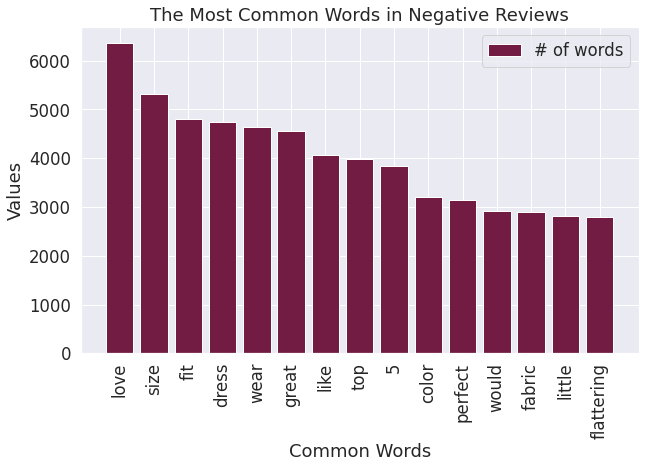

In [ ]:
#Plotting a graph for the most common words
plt.figure(figsize=(10,6))
plt.bar(positive_count.Words, positive_count.Values, color = '#721C43', label = '# of words')
plt.title('The Most Common Words in Negative Reviews')
plt.xlabel('Common Words')
plt.ylabel('Values')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

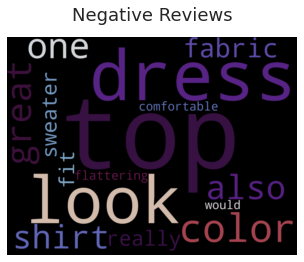

In [ ]:
neg_text = ' '.join(negative['CleanedReviews'])

#adding more stop words
additional_stop_words = ["sooo", "https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 
                         'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'love', 'like', '5',
                         'perfect'] + list(stop_words)

negative_cloud = WordCloud(background_color='black', stopwords=additional_stop_words,  width=2000, height= 1500, max_words=15, colormap="twilight").generate(pos_text)
plt.imshow(negative_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews", y = 1.05)
plt.show()


# Evaluating the Model Prior to Building a Recommendation Model

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
df.head()

,Clothing ID,Age,Review,Rating,Recommended?,Positive Feedback Count,Division,Department,Style,AgeGroup,Perception,CleanedReviews
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,18-33,Positive,absolutely wonderful silky sexy comfortable
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,34-39,Positive,love dress sooo pretty happened find store gla...
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,55-99,Negative,high hopes dress really wanted work initially ...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,46-54,Positive,love jumpsuit fun flirty fabulous every time w...
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,46-54,Positive,shirt flattering due adjustable front tie perf...


Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

Tokenization is important to:
- Count the number of words in the text
- Count the frequency of the word, that is, the number of times a particular word is present

- https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

Making the bag of words via sparse matrix
- take all the different words of reviews without any duplicate words
- Rows = reviews

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

#Extract max 1500 features --> use 1500 most occurring words as features for training our classifier
#converting reviews into values with sparse matrix
countvectors = CountVectorizer(max_features = 1500)

X = countvectors.fit_transform(df['CleanedReviews'])
Y = df['Recommended?']

In [ ]:
#Split the model for test and train dataset
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

## Choosing Model: Random Forest Classfier

In [ ]:
# Fitting Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

# to get better results 
model = RandomForestClassifier(n_estimators = 200,
                            criterion = 'entropy')
                              
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Predicting the model test result 
Y_pred = model.predict(X_test) 
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#confusion_matrix with dataframe
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,403,832
1,80,5474


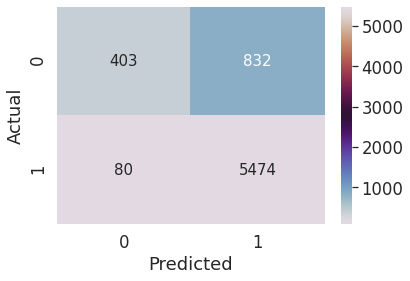

In [ ]:
#Checking the accuracy score with confusion matrix
#fmt = d -> interger
#annot (annotation)-> to show value
#annot_kws to show font size
#cmap -> to change the color
sns.heatmap(confusion_matrix, annot=True, cmap="twilight", fmt= "d", annot_kws={"size": 15})
plt.show()

In [ ]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.33      0.47      1235
           1       0.87      0.99      0.92      5554

    accuracy                           0.87      6789
   macro avg       0.85      0.66      0.70      6789
weighted avg       0.86      0.87      0.84      6789



In [ ]:
accuracy_score(Y_test, Y_pred)

0.865665046398586

In [ ]:
recall_score(Y_test, Y_pred)

0.9855959668707238

## Summarize and Compare Performance

In [ ]:
perf_df = pd.DataFrame(columns = ['Random Forest', 'Ada Boost', 'Gradient Boost'],  
                   index = ['Accuracy', 'AUC', 'Recall', 'Precision']) 

perf_df

,Random Forest,Ada Boost,Gradient Boost
Accuracy,NaN,NaN,NaN
AUC,NaN,NaN,NaN
Recall,NaN,NaN,NaN
Precision,NaN,NaN,NaN


In [ ]:
#set N_estimator at 100
N_est = 100
def model():
  for index, row in perf_df.iterrows():
#Filling Accuracy Row
    if index == 'Accuracy':

#Generating Random Forest Accuracy
      RF = RandomForestClassifier(n_estimators=N_est, max_features="auto", random_state=101)
      RF.fit(X_train, Y_train)
      RF_pred = RF.predict(X_test)
      accuracy = accuracy_score(Y_test, RF_pred)
      perf_df.at[index, 'Random Forest'] = accuracy
#Generating Ada Boost Accuracy
      AB = AdaBoostClassifier(n_estimators=N_est, random_state=101)
      AB.fit(X_train, Y_train)
      AB_pred = AB.predict(X_test)
      accuracy = accuracy_score(Y_test, AB_pred)
      perf_df.at[index, 'Ada Boost'] = accuracy
#Generating Gradient Boost Accuracy
      GB = GradientBoostingClassifier(n_estimators = N_est, random_state=101)
      GB.fit(X_train, Y_train)
      GB_pred = GB.predict(X_test)
      accuracy = accuracy_score(Y_test, GB_pred)
      perf_df.at[index, 'Gradient Boost'] = accuracy

#Filling AUC row
    if index == 'AUC':

#Generating RF AUC score
      AUC = roc_auc_score(Y_test, RF_pred)
      perf_df.at[index, 'Random Forest'] = AUC
#Generating Ada Boost AUC score
      AUC = roc_auc_score(Y_test, AB_pred)
      perf_df.at[index, 'Ada Boost'] = AUC
#Generating Gradient Boost AUC score
      AUC = roc_auc_score(Y_test, GB_pred)
      perf_df.at[index, 'Gradient Boost'] = AUC

#Filling Recall row
    if index == 'Recall':
#Generating RF Recall score
      Recall = recall_score(Y_test, RF_pred)
      perf_df.at[index, 'Random Forest'] = Recall
#Generating Ada Boost Recall score
      Recall = recall_score(Y_test, AB_pred)
      perf_df.at[index, 'Ada Boost'] = Recall
#Generating Gradient Boost Recall score
      Recall = recall_score(Y_test, GB_pred)
      perf_df.at[index, 'Gradient Boost'] = Recall

#Filling Precision row
    if index == 'Precision':
#Generating RF Precision score
      Precision = precision_score(Y_test, RF_pred)
      perf_df.at[index, 'Random Forest'] = Precision
#Generating Ada Boost Precision score
      Precision = precision_score(Y_test, AB_pred)
      perf_df.at[index, 'Ada Boost'] = Precision
#Generating Gradient Boost Precision score
      Precision = precision_score(Y_test, GB_pred)
      perf_df.at[index, 'Gradient Boost'] = Precision


model()
perf_df.head()

,Random Forest,Ada Boost,Gradient Boost
Accuracy,0.864634,0.866843,0.856091
AUC,0.658159,0.72468,0.640659
Recall,0.982715,0.948145,0.979294
Precision,0.86897,0.895274,0.863196


Among three ensemble models, Ada Boost has the highest accuracy, AUC score and Precision score whereas Random Forest has the highest recall score. However, the most important insight is whether the model can make correct predictions or not. Hence, recall score is more important as it quantifies the number of correct predictions that the model makes. Therefore, Random Forest is the best model to classifiy positive and negative reviews. 